In [3]:
import json
import os
import pickle
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.optimizers.schedules import ExponentialDecay
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import random

# Check the current working directory to ensure we're in the correct location
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\Jbaru\OneDrive\Documents\MEGA\Work_projects\chatbot_project\notebooks


In [4]:
sys.path.append(os.path.join(os.pardir, 'chatbot'))

In [5]:
chatbot_model = ChatbotModel(intents_path=os.path.join(os.pardir, 'chatbot', 'intents.json'))


In [6]:
# Load the data
chatbot_model.load_data()

In [11]:
# Prepare the training data
train_x, train_y = chatbot_model.prepare_training_data()

In [12]:
# Build the model
chatbot_model.build_model(train_x, train_y)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0187 - loss: 4.0410 - val_accuracy: 0.0000e+00 - val_loss: 4.0639
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0413 - loss: 4.0131 - val_accuracy: 0.0769 - val_loss: 4.0687
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0804 - loss: 3.9015 - val_accuracy: 0.0769 - val_loss: 4.1011
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0660 - loss: 3.8886 - val_accuracy: 0.0769 - val_loss: 4.1368
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1037 - loss: 3.6958 - val_accuracy: 0.0769 - val_loss: 4.1899
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1115 - loss: 3.7114 - val_accuracy: 0.0769 - val_loss: 4.1923
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1500 - loss: 3.5229 - val_accuracy: 0.0769 - val_loss: 4.2273
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1358 - loss: 3.5069 - val_accuracy: 0.0769

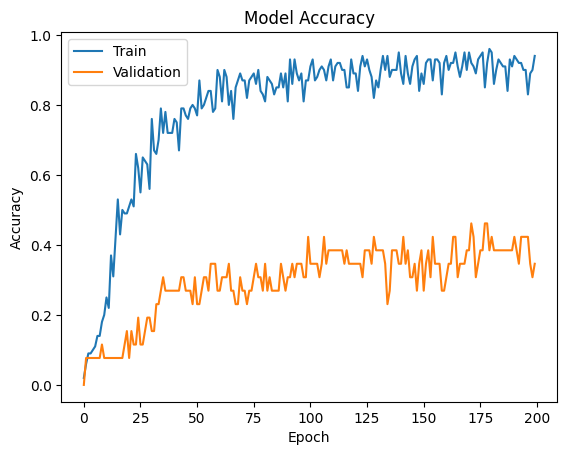

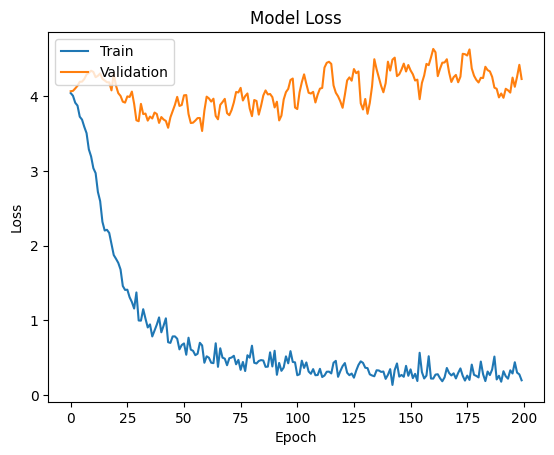

In [13]:
# Start the training process
history = chatbot_model.train(train_x, train_y)

In [15]:
# After training the model, we'll save the trained model and the tokenizer
chatbot_model.model.save('../chatbot/chatbot_model.h5')
pickle.dump(chatbot_model.words, open('../chatbot/words.pkl', 'wb'))
pickle.dump(chatbot_model.classes, open('../chatbot/classes.pkl', 'wb'))


In [16]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

AttributeError: 'NoneType' object has no attribute 'history'